In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import matplotlib.image as mpimg

scaler = preprocessing.MinMaxScaler((0,1))
plt.rcParams['savefig.dpi'] = 50

### Try gen more samples

In [2]:
with open('./Baseline/abstar_template/flare_star.txt') as f:
    fs=f.readlines()
with open('./Baseline/abstar_template/microlensing.txt') as f:
    ml=f.readlines()
fs=np.array([eval(i) for i in fs])
ml=np.array([eval(i) for i in ml])

In [3]:
def squeeze_tgt(ar, tgt_length):
    raw_len = len(ar)
    coef = float(raw_len) / float(tgt_length)
    return np.interp(np.arange(tgt_length) * coef , np.arange(raw_len), ar)

In [4]:
# fs_sqed=squeeze_tgt(fs, 60)
fs=scaler.fit_transform(fs.reshape(-1,1)).reshape(1,-1)[0]
# ml_sqed=squeeze_tgt(ml, 60)
ml=scaler.fit_transform(ml.reshape(-1,1)).reshape(1,-1)[0]

In [5]:
#home made template for backup
ml_home_made=np.array([ 1.,0.98677131,0.96791697,0.93781135,0.89608109,0.8485385,
  0.78395594, 0.71414581, 0.63388054, 0.54466581, 0.45097635, 0.34690623,
  0.24059732, 0.12981085, 0.0172702 ,-0.09614754,-0.20791206,-0.31770684,
 -0.42356213,-0.52280604,-0.61874426,-0.70120434,-0.77818917,-0.8442235,
 -0.8978359 ,-0.94523732,-0.97262153,-0.99315825,-1.        ,-0.99336329,
 -0.97998735,-0.94751778,-0.90929573,-0.85956872,-0.79995783,-0.73540499,
 -0.65891448,-0.57950872,-0.49427243,-0.40543017,-0.31478492,-0.22205548,
 -0.12968627,-0.03803755, 0.05097536, 0.13867037, 0.21994132, 0.29840999,
  0.3712741 , 0.43757406, 0.50059196, 0.55289295, 0.60151917, 0.64279583,
  0.67687057, 0.70734435, 0.72770549, 0.74505508, 0.75638158, 0.76015708])
ml_home_made=scaler.fit_transform(ml_home_made.reshape(-1,1)).reshape(1,-1)[0]

#### gen 2D samples

In [6]:
from io import BytesIO

In [7]:
def img_to_array(imageFile):
    img = mpimg.imread(imageFile).astype(np.float)
    img=img[:,:,0]
    img=1-img
#     img[img!=0]=1
    return img.reshape((50,50,1))

In [8]:
def gen_img_rand_samples(template):

    #width stand for density
    width=np.random.randint(30, 300)
#     width=50
    template=squeeze_tgt(template, width)
#     print('width:{}'.format(width))

    pad_total=np.random.randint(width*0.5, width*2)
#     pad_total=width
    left_pad=np.random.randint(0, pad_total)
    right_pad=pad_total-left_pad

    template=np.pad(template,(left_pad,right_pad), mode='constant',constant_values=template.max())
        
    fig,ax=plt.subplots(figsize=(1,1))

    ax.scatter(np.arange(width+pad_total)+np.random.normal(loc=0, scale=1, size=width+pad_total)/10,\
               template+np.random.normal(loc=0, scale=1, size=width+pad_total)/10,\
               color='black',alpha=0.7,s=3)
    ax.invert_yaxis()
    ax.axis('off')
    ax.margins(0, 0)
#     plt.show()
    #申请缓冲地址
    buffer_ = BytesIO()
    plt.savefig(buffer_,format = 'png')
    plt.close(fig)
    buffer_.seek(0)
    #从内存中读取
    img_tmp=img_to_array(buffer_)
    #释放缓存    
    buffer_.close()
    return img_tmp


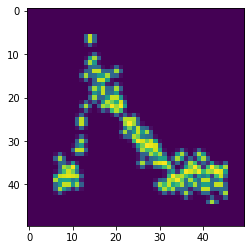

In [9]:
img_tmp=gen_img_rand_samples(fs)
plt.imshow(img_tmp.reshape(50,50))

In [10]:
def gen_img_rand_0_samples():
    size_rnd=np.random.randint(30, 300)
#     size_rnd=300
    rand_sca=np.random.normal(loc=0, scale=1, size=size_rnd) 

    add_times=np.random.randint(1, 5)
#     print(add_times)
    for t in range(add_times):
        th = np.linspace(0, 2*np.pi, size_rnd)
        rand_shift=np.random.normal(loc=0, scale=1)
        rand_sca_t=np.cos(0.5*th*np.sign(rand_shift)+rand_shift)
#         rand_sca_t=scaler.fit_transform(rand_sca_t.reshape(-1,1)).reshape(1,-1)[0]
        rand_sca=rand_sca+rand_sca_t/add_times+np.random.normal(loc=0, scale=1, size=size_rnd)/10
#     rand_sca=scaler.fit_transform(rand_sca.reshape(-1,1)).reshape(1,-1)[0]
    
    fig,ax=plt.subplots(figsize=(1,1))

    ax.scatter(np.arange(size_rnd)+np.random.normal(loc=0, scale=1, size=size_rnd)/10,\
               rand_sca,\
               color='black',alpha=0.7,s=3)
    ax.invert_yaxis()
    ax.axis('off')
    ax.margins(0, 0)
#     plt.show()
    #申请缓冲地址
    buffer_ = BytesIO()
    plt.savefig(buffer_,format = 'png')
    plt.close(fig)
    buffer_.seek(0)
    #从内存中读取
    img_tmp=img_to_array(buffer_)
    #释放缓存    
    buffer_.close()
    return img_tmp

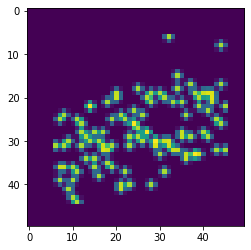

In [11]:
img_tmp=gen_img_rand_0_samples()
plt.imshow(img_tmp.reshape(50,50))

#### 2D MNIST MODEL

In [12]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
import matplotlib.image as mpimg

##### Gen Train data set

In [35]:
import glob
path_0 = "./Train92/0/*.png"
# path_0 = "./Finded_0909/*.png"
path_1 = "./Train92/1/*.png"
path_2 = "./Train92/2/*.png"
pool_0=[imageFile for imageFile in glob.glob(path_0)]
pool_1=[imageFile for imageFile in glob.glob(path_1)]
pool_2=[imageFile for imageFile in glob.glob(path_2)]

In [36]:
len(pool_0)

154

In [16]:
train_sample_size=3000
x_train = np.zeros((train_sample_size, 50,50,1))
y_train = np.zeros((train_sample_size,3))

In [37]:
# [0,0,1]2 for ml
# [0,1,0]1 for fs
# [1,0,0]0 for blank
y0=np.array([1,0,0])
y1=np.array([0,1,0])
y2=np.array([0,0,1])

sample_monitor0=[]
sample_monitor1=[]
sample_monitor2=[]
for i in range(train_sample_size):
    rnd_2=np.random.randint(len(pool_2))
    rnd_1=np.random.randint(len(pool_1))
    rnd_0=np.random.randint(len(pool_0))
    
    ml_fs_bl=np.argmax(np.random.normal(loc=0, scale=1, size=3))


    
    if ml_fs_bl==2:
        if i<=24:
            x_train[i] = img_to_array(pool_2[rnd_2])
            sample_monitor2.append(rnd_2)
        else:
            x_train[i]=gen_img_rand_samples(ml)
        y_train[i] = y2
    elif ml_fs_bl==1:
        if i<=80:
            x_train[i] = img_to_array(pool_1[rnd_1])
            sample_monitor1.append(rnd_1)
        else:
            x_train[i]=gen_img_rand_samples(fs)
        y_train[i] = y1
    else:
        if i<=1000:
            x_train[i] = img_to_array(pool_0[rnd_0])
        else:
            x_train[i] = gen_img_rand_0_samples()
        y_train[i] = y0

In [38]:
print(set(sample_monitor2))
print(set(sample_monitor1))

{0, 1, 2}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


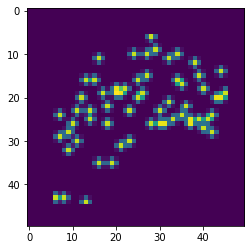

In [21]:
plt.imshow(x_train[2100].reshape(50,50))

In [57]:
#gen manmade samples only
for i in range(train_sample_size):
    ml_fs_bl=np.argmax(np.random.normal(loc=0, scale=1, size=3))
    if ml_fs_bl==2:
        x_train[i]=gen_img_rand_samples(ml_home_made)
        y_train[i] = y2
    elif ml_fs_bl==1:
        x_train[i]=gen_img_rand_samples(fs)
        y_train[i] = y1
    else:
        x_train[i] = gen_img_rand_0_samples()
        y_train[i] = y0

In [36]:
#train sample only
sample_monitor0=[]
sample_monitor1=[]
sample_monitor2=[]
for i in range(train_sample_size):
    rnd_2=np.random.randint(len(pool_2))
    rnd_1=np.random.randint(len(pool_1))
    rnd_0=np.random.randint(len(pool_0))
    
    ml_fs_bl=np.argmax(np.random.normal(loc=0, scale=1, size=8))


    
    if ml_fs_bl==2:
        if i<=2000:
            x_train[i] = img_to_array(pool_2[rnd_2])
            sample_monitor2.append(rnd_2)
        else:
            x_train[i]=gen_img_rand_samples(ml)
        y_train[i] = y2
    elif ml_fs_bl==1:
        if i<=2000:
            x_train[i] = img_to_array(pool_1[rnd_1])
            sample_monitor1.append(rnd_1)
        else:
            x_train[i]=gen_img_rand_samples(fs)
        y_train[i] = y1
    else:
        if i<=2000:
            x_train[i] = img_to_array(pool_0[rnd_0])
        else:
            x_train[i] = gen_img_rand_0_samples()
        y_train[i] = y0

#### data parpare done

In [23]:
num_classes = 3
input_shape = (50,50,1)

In [24]:
x_train.shape

(3000, 50, 50, 1)

In [25]:
y_train.shape

(3000, 3)

In [23]:
#LeNet
# model = keras.Sequential(
#     [
#         keras.Input(shape=input_shape),
#         layers.Conv2D(6, kernel_size=(23, 23),activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
        
#         layers.Conv2D(16, kernel_size=(5, 5), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
        
#         layers.Flatten(),

#         layers.Dense(120, activation="relu"),
#         layers.Dropout(0.5),
#         layers.Dense(84, activation="relu"),
#         layers.Dense(num_classes, activation="softmax"),
#     ]
# )

# model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         3180      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dropout (Dropout)            (None, 120)               0

In [23]:
#Modify LeNet
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(6, kernel_size=(5, 5),activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Conv2D(16, kernel_size=(4, 4), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Flatten(),

        layers.Dense(120, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(84, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 16)        1552      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [26]:
from tensorflow.keras.models import load_model
model = load_model("./LeNet_20200909_img_50_50.h5")

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 16)        1552      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [40]:
batch_size = 100
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["categorical_accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 2700 samples, validate on 300 samples
Epoch 1/15
2700/2700 [==============================] - 2s 752us/sample - loss: 0.0019 - categorical_accuracy: 0.9993 - val_loss: 0.0130 - val_categorical_accuracy: 0.9967
Epoch 2/15
2700/2700 [==============================] - 2s 609us/sample - loss: 0.0030 - categorical_accuracy: 0.9993 - val_loss: 6.9292e-06 - val_categorical_accuracy: 1.0000
Epoch 3/15
2700/2700 [==============================] - 2s 618us/sample - loss: 0.0030 - categorical_accuracy: 0.9993 - val_loss: 0.0159 - val_categorical_accuracy: 0.9933
Epoch 4/15
2700/2700 [==============================] - 2s 611us/sample - loss: 0.0018 - categorical_accuracy: 0.9993 - val_loss: 8.7298e-05 - val_categorical_accuracy: 1.0000
Epoch 5/15
2700/2700 [==============================] - 2s 619us/sample - loss: 0.0045 - categorical_accuracy: 0.9985 - val_loss: 6.5668e-04 - val_categorical_accuracy: 1.0000
Epoch 6/15
2700/2700 [==============================] - 2s 615us/sample - loss: 0

In [43]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.009613556071805458
Test accuracy: 0.99666667


In [39]:
from sklearn.metrics import confusion_matrix
true_y=np.apply_along_axis(np.argmax,1,y_train)

pred_y=model.predict(x_train)
pred_y=np.apply_along_axis(np.argmax,1,pred_y)

confusion_mat = confusion_matrix(true_y, pred_y)

confusion_mat

array([[1003,    3,    0],
       [   0,  996,    0],
       [   0,    0,  998]], dtype=int64)

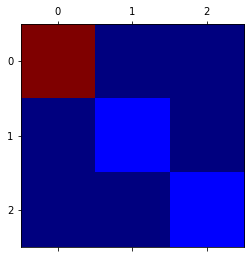

In [84]:
plt.matshow(confusion_mat, cmap='jet')#viridis,jet_r,rainbow

In [44]:
mp = "./LeNet_202009122_img_50_50.h5"
model.save(mp)

#### view Grad CAM

##### view using image

In [29]:
import tensorflow as tf
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
from tensorflow.keras import models

In [30]:
from scipy import interpolate

In [119]:
from tensorflow.keras.models import load_model
model = load_model("./LeNet_20200729_img_50_50.h5")

In [183]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         3180      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [45]:
show_img_path=pool_1[5]
print(show_img_path)
# show_img_path='./Finded_0909/'+'ref_044_14110425-G0013_410680_28021+1452-1652.png'
img=img_to_array(show_img_path)
img=img.reshape(1,50,50,1)

./Train92/1\ref_033_15300085-G0013_1742006_16050+828-1028.png


In [81]:
img=x_train[666].reshape(1,50,50,1)

1 1.0


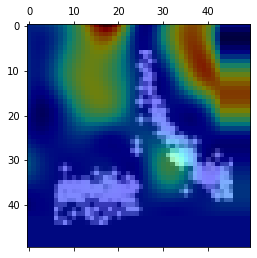

In [46]:
last_conv_layer='conv2d_2'


predicts=model.predict(img)
print(np.argmax(predicts[0]),predicts[0].max())

# get the last conv layer
last_conv_layer = model.get_layer(last_conv_layer)

heatmap_model = models.Model([model.inputs], [last_conv_layer.output, model.output])

with tf.GradientTape() as gtape:
    conv_output, Predictions = heatmap_model(img)
    prob = Predictions[:, np.argmax(Predictions[0])] # 最大可能性类别的预测概率
    grads = gtape.gradient(prob, conv_output)  # 类别与卷积层的梯度 (1,14,14,512)
    pooled_grads = K.mean(grads, axis=(0,1,2)) # 特征层梯度的全局平均代表每个特征层权重
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1) #权重与特征层相乘，512层求和平均

heatmap = np.maximum(heatmap, 0)
max_heat = np.max(heatmap)
if max_heat == 0:
    max_heat = 1e-10
heatmap /= max_heat
# plt.matshow(heatmap[0], cmap='jet')#viridis,jet_r,rainbow


heatmap_sample=heatmap[0]

cov_size=8
x = np.arange(0, cov_size, 1)
y = np.arange(0, cov_size, 1)

f = interpolate.interp2d(x, y, heatmap_sample, kind='cubic')

xnew = np.linspace(0, cov_size, 50)
ynew = np.linspace(0, cov_size, 50)
znew = f(xnew, ynew)

plt.matshow(znew, cmap='jet')#viridis,jet_r,rainbow
plt.imshow(img.reshape(50,50),cmap='Greys_r',alpha=0.5)